## FER 2013 Sentiment Analysis using VGG16

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations.
from tensorflow.keras.models import Sequential # These are required for building our new model.
from tensorflow.keras.layers import Dense # These are required for building our new model.
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project.
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # For operations like: Image open, resize image.
import matplotlib.pyplot as plt
import numpy as np


### Loading dataset

In [2]:
train_files_path = "dataset/train"
test_files_path = "dataset/test"

In [3]:
# To test a random image later
img = load_img("test2.png")

In [4]:
print(img_to_array(img).shape)

(1054, 900, 3)


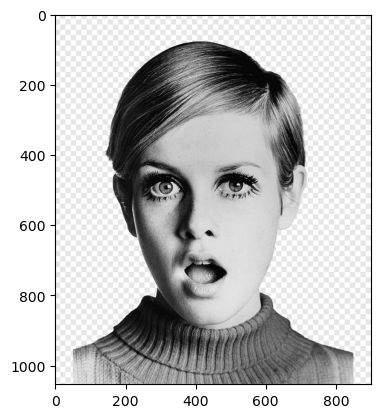

In [5]:
# Let's see our image
plt.imshow(img)
plt.show()

## Building dataset

In [6]:
# For the VGG16 model we will use, the images must be 244x244 in size. 
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
# We will use this value later when creating the output layer.
numberOfClasses = 7

## Model building

In [8]:
vgg = VGG16()

In [9]:
# To see layers of VGG16 model.
vgg_layers = vgg.layers
print(vgg_layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001950A125FD0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000195151B09A0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000195151C81F0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000195151C8400>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001951482F370>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019515212CD0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000195151C83D0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019515228AF0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019515228A60>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019515230730>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000195152331C0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000195

In [10]:
# We load the layers of the VGG16 model, except the last layer, into our model.
vggmodel_layersize = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize):
    model.add(vgg_layers[i])

In [11]:
# We add the last layer by adjusting it according to the class number of our dataset.
# The value we set here to false is because we do not want to re-train the previous layers.
for layers in model.layers:
    layers.trainable = False

# Since we have omitted the original output layer of VGG16, we have to add our new output layer to my new model.
model.add(Dense(numberOfClasses, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

## Compiling

In [12]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [13]:
batch_size = 16 # The number of data samples the model uses to train in each iteration.
model.fit_generator(train_data,
                           steps_per_epoch=1000//batch_size,
                           epochs= 10, # The model will be trained for the specified number of epochs. Ypu can increase this value.
                           validation_data=test_data,
                           validation_steps= 200//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
62/62 [==============================] - 237s 4s/step - loss: 2.4055 - accuracy: 0.2495 - val_loss: 1.8356 - val_accuracy: 0.2995
Epoch 2/10
62/62 [==============================] - 232s 4s/step - loss: 2.0501 - accuracy: 0.2959 - val_loss: 2.2680 - val_accuracy: 0.2656
Epoch 3/10
62/62 [==============================] - 240s 4s/step - loss: 2.0014 - accuracy: 0.3130 - val_loss: 2.2340 - val_accuracy: 0.2266
Epoch 4/10
62/62 [==============================] - 234s 4s/step - loss: 2.0166 - accuracy: 0.3105 - val_loss: 2.0897 - val_accuracy: 0.2708
Epoch 5/10
62/62 [==============================] - 236s 4s/step - loss: 1.9814 - accuracy: 0.3327 - val_loss: 2.1049 - val_accuracy: 0.3203
Epoch 6/10
62/62 [==============================] - 233s 4s/step - loss: 1.9819 - accuracy: 0.3170 - val_loss: 2.1360 - val_accuracy: 0.3542
Epoch 7/10
62/62 [==============================] - 210s 3s/step - loss: 1.956

## Let's make prediction

In [116]:
img = Image.open("test2.png").resize((224,224))

In [117]:
img = np.array(img)
img.shape

(224, 224)

In [122]:
# If image dimension is (224,244) run this code block.
if img.ndim == 2:
    img = np.stack((img, img, img), axis=-1)  # (224, 224, 3)
    img = np.expand_dims(img, axis=0)  # (1, 224, 224, 3)
print(img.shape)

(1, 224, 224, 3)


In [123]:
# If image dimension is (224,224,3) run this code block.
if img.ndim == 3:
    img = img.reshape(-1,224,224,3) 
img.shape

(1, 224, 224, 3)

In [124]:
print(img.ndim)

4


In [125]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input for VGG16 model.
img = preprocess_input(img)   

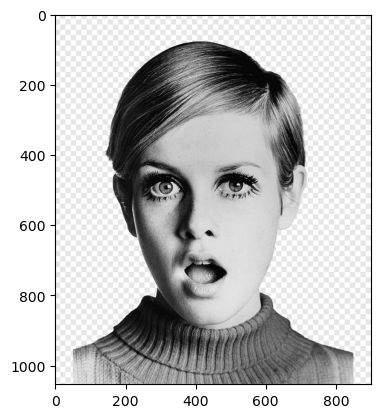

In [126]:
img_for_display = load_img("test2.png")
plt.imshow(img_for_display)
plt.show()

In [127]:
preds = model.predict(img)

In [128]:
# Let's see contents of prediction array.
preds

array([[3.1515348e-03, 1.3735992e-13, 3.5937861e-04, 2.5257716e-01,
        9.0384923e-02, 6.5350914e-01, 1.7940762e-05]], dtype=float32)

In [129]:
image_classes = ["angry","disgust","fear","happy","neutral","sad","suprize"]

result = np.argmax(preds[0])
print(image_classes[result]) 

sad
